In [40]:
from keras.utils import np_utils       #导入np_utils和numpy模块
import numpy as np
np.random.seed(10)

In [42]:
from keras.datasets import mnist       #读取已下载的MNIST数据
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [43]:
x_Train = x_train_image.reshape(60000,784).astype('float32')       #将数字图像特征值reshape转换
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [44]:
x_Train_normalize = x_Train /255      #将数字图像特征值标准化
x_Test_normalize = x_Test /255

In [45]:
y_Train_OneHot =np_utils.to_categorical(y_train_label)            #将数字真实值OneHot Encoding转化
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [46]:
from keras.models import Sequential  #导入Sequential和Dense模块
from keras.layers import Dense

In [49]:
model = Sequential()                 #创建Sequential模型

In [50]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))   #建立隐藏层和输入层

In [52]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))             #建立输出层

In [53]:
print(model.summary())              #查看模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    #定义训练方式

In [57]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4387 - acc: 0.8828 - val_loss: 0.2180 - val_acc: 0.9408
Epoch 2/10
 - 1s - loss: 0.1907 - acc: 0.9458 - val_loss: 0.1553 - val_acc: 0.9559
Epoch 3/10
 - 1s - loss: 0.1354 - acc: 0.9617 - val_loss: 0.1256 - val_acc: 0.9651
Epoch 4/10
 - 1s - loss: 0.1029 - acc: 0.9704 - val_loss: 0.1123 - val_acc: 0.9678
Epoch 5/10
 - 1s - loss: 0.0813 - acc: 0.9774 - val_loss: 0.0977 - val_acc: 0.9714
Epoch 6/10
 - 1s - loss: 0.0661 - acc: 0.9817 - val_loss: 0.0934 - val_acc: 0.9719
Epoch 7/10
 - 1s - loss: 0.0546 - acc: 0.9851 - val_loss: 0.0913 - val_acc: 0.9736
Epoch 8/10
 - 1s - loss: 0.0461 - acc: 0.9876 - val_loss: 0.0816 - val_acc: 0.9753
Epoch 9/10
 - 1s - loss: 0.0382 - acc: 0.9902 - val_loss: 0.0813 - val_acc: 0.9759
Epoch 10/10
 - 1s - loss: 0.0318 - acc: 0.9917 - val_loss: 0.0796 - val_acc: 0.9757


In [61]:
import matplotlib.pyplot as plt                            #建立show_train_history显示训练过程
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

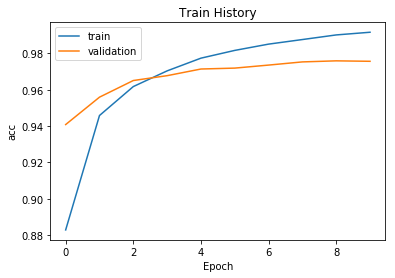

In [62]:
show_train_history(train_history,'acc','val_acc')         #进行准确率评估

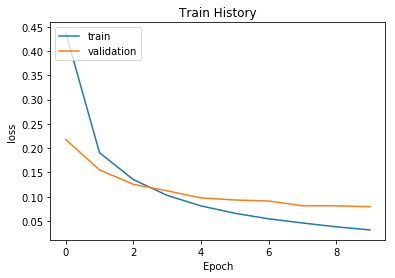

In [63]:
show_train_history(train_history,'loss','val_loss')      #进行误差评估

In [64]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)          #评估模型准确率
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 19us/step

accuracy= 0.9759


In [68]:
prediction = model.predict_classes(x_Test)                      #执行预测

In [69]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [77]:
import matplotlib.pyplot as plt                                         #创建plot_images_labels_prediction函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num =25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(prediction[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show

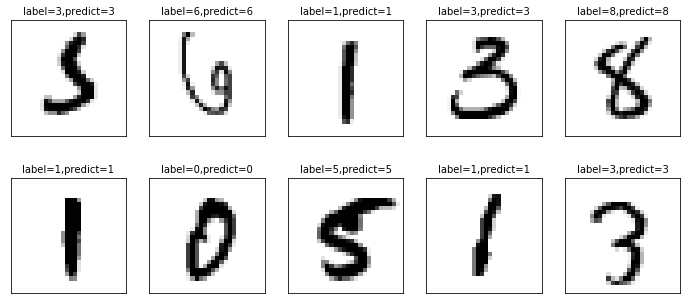

In [78]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)    #显示预测结果

In [80]:
import pandas as pd                               #导入pandas并使用pandas.crosstab建立混淆矩阵
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1008,2,1,0,2,4,9,0
3,0,0,3,994,0,0,0,3,6,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,16,1,854,7,1,7,3
6,6,3,2,1,3,3,938,0,2,0
7,0,5,13,7,1,0,0,989,5,8
8,5,0,3,6,2,1,1,2,953,1


In [82]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})   #建立真实值与预测值Dataframe
df[:2] 

,label,predict
0,7,7
1,2,2


In [84]:
df[(df.label==5)&(df.predict==3)]         #查询真实值为5但预测值为3的数据

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


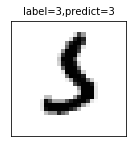

In [85]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)      #查看第340项数据

In [87]:
model = Sequential()                     #将隐藏层神经元由256增加至1000，用以提升模型准确率
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [89]:
print(model.summary())                  #查看模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])        #定义训练方式

In [92]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.2905 - acc: 0.9165 - val_loss: 0.1535 - val_acc: 0.9566
Epoch 2/10
 - 4s - loss: 0.1148 - acc: 0.9673 - val_loss: 0.1207 - val_acc: 0.9643
Epoch 3/10
 - 4s - loss: 0.0736 - acc: 0.9791 - val_loss: 0.0928 - val_acc: 0.9732
Epoch 4/10
 - 4s - loss: 0.0521 - acc: 0.9852 - val_loss: 0.0824 - val_acc: 0.9743
Epoch 5/10
 - 4s - loss: 0.0361 - acc: 0.9904 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 6/10
 - 4s - loss: 0.0248 - acc: 0.9941 - val_loss: 0.0744 - val_acc: 0.9777
Epoch 7/10
 - 4s - loss: 0.0183 - acc: 0.9955 - val_loss: 0.0731 - val_acc: 0.9775
Epoch 8/10
 - 4s - loss: 0.0138 - acc: 0.9967 - val_loss: 0.0752 - val_acc: 0.9782
Epoch 9/10
 - 4s - loss: 0.0099 - acc: 0.9980 - val_loss: 0.0714 - val_acc: 0.9793
Epoch 10/10
 - 4s - loss: 0.0069 - acc: 0.9991 - val_loss: 0.0788 - val_acc: 0.9771


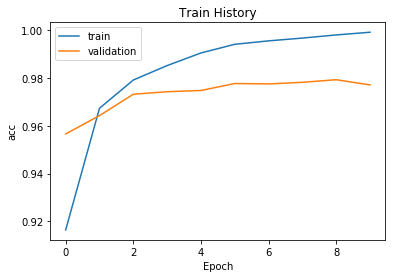

In [93]:
show_train_history(train_history,'acc','val_acc')          #查看训练过程准确率

In [94]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)   #预测准确率
print()
print('accuracy',scores[1])

10000/10000 [==============================] - 0s 43us/step

accuracy 0.9796


In [97]:
from keras.models import Sequential                   #将隐藏层神经元由256增加至1000，并添加Dropout功能用以提升模型准确率
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [98]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])      #定义训练方式

In [100]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3537 - acc: 0.8942 - val_loss: 0.1621 - val_acc: 0.9537
Epoch 2/10
 - 4s - loss: 0.1596 - acc: 0.9536 - val_loss: 0.1182 - val_acc: 0.9649
Epoch 3/10
 - 4s - loss: 0.1152 - acc: 0.9664 - val_loss: 0.0970 - val_acc: 0.9703
Epoch 4/10
 - 4s - loss: 0.0910 - acc: 0.9729 - val_loss: 0.0877 - val_acc: 0.9726
Epoch 5/10
 - 4s - loss: 0.0742 - acc: 0.9777 - val_loss: 0.0810 - val_acc: 0.9763
Epoch 6/10
 - 4s - loss: 0.0647 - acc: 0.9798 - val_loss: 0.0754 - val_acc: 0.9786
Epoch 7/10
 - 4s - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0755 - val_acc: 0.9782
Epoch 8/10
 - 4s - loss: 0.0470 - acc: 0.9853 - val_loss: 0.0709 - val_acc: 0.9795
Epoch 9/10
 - 5s - loss: 0.0420 - acc: 0.9866 - val_loss: 0.0699 - val_acc: 0.9796
Epoch 10/10
 - 4s - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0671 - val_acc: 0.9812


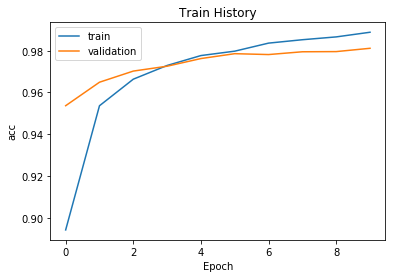

In [101]:
show_train_history(train_history,'acc','val_acc')       #查看训练过程准确率

In [102]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)      #查看准确率
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 45us/step

accuracy= 0.9824


In [103]:
model = Sequential()               #加入两个隐藏层并加入Dropout功能进一步提升模型精确率

In [104]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [105]:
model.add(Dropout(0.5))

In [106]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))

In [107]:
model.add(Dropout(0.5))

In [108]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [109]:
print(model.summary())           #查看模型摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])         #定义训练方式

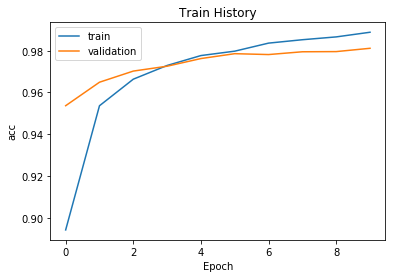

In [112]:
show_train_history(train_history,'acc','val_acc')          #查看训练过程准确率

In [113]:
scores = model.evaluate(x=x_Test_normalize,y=y_Test_OneHot)       #查看准确率
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 91us/step

accuracy= 0.0979
